In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
images = train.iloc[:,1:].values
images = np.divide(images, 255.0)

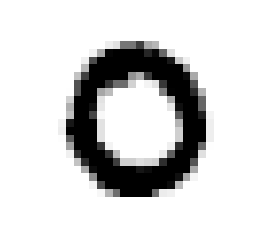

In [9]:
image_number = 1
image = images[image_number].reshape(28,28)

plt.axis('off')
plt.imshow(image, cmap=cm.binary)

In [33]:
labels = train['label'].values.ravel()

In [51]:
label_count = labels.shape[0]
labels_one_hot = np.eye(label_count, 10, dtype=int)[labels]

In [46]:
train_size = 33000
x_train = images[train_size:]
y_train = labels_one_hot[:train_size]
x_test = images[train_size:]
y_test = labels_one_hot[:train_size]

In [47]:
def random_weights(shape):
    weights = tf.truncated_normal(shape, stdev=.1)
    return tf.Variable(weights)

In [48]:
def bias(shape):
    bias = tf.constant(.1, shape=shape)
    return tf.Variable(bias)

In [49]:
def conv_layer(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [50]:
def compress(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
# images
x = tf.placeholder('float', shape=[None, image_size])
# labels
y_ = tf.placeholder('float', shape=[None, labels_count])